## Assignment 2 : Logistic Regression


### Part A : Defining functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# For plotting the data in feature space
def PlotData(x,y):  
    z0 = list(zip(list(x[:,0]), y))
    z1 = list(zip(list(x[:,1]),y))

    z0_1 = np.array([k[0] for k in z0 if k[1] == 1 ])
    z0_0 = np.array([k[0] for k in z0 if k[1] == 0])
    z1_1 = np.array([k[0] for k in z1 if k[1] == 1])
    z1_0 = np.array([k[0] for k in z1 if k[1] == 0])
    fig, ax = plt.subplots(figsize = (10,7))
    ax.plot(z0_1,z1_1, linestyle = " ", marker = 'o')
    ax.plot(z0_0,z1_0, linestyle = " ", marker = '+')
    return ax    #returns an axes object

In [3]:
# Hypothesis in logistic regression is given by the sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z)) #sigmoid function

In [4]:
def CostFunction(theta,x,y):
    h = sigmoid(x@theta).reshape(-1,1)
    cost  =  (-1/y.shape[0]) *sum(y*np.log(h) + (1-y)*np.log(1-h))
    return cost

In [5]:
# Cost function (with regularization term)
def CostFunctionReg(theta,x,y,lamda):
    cost = CostFunction(theta,x,y)
    cost = cost + (lamda/(2*x.shape[0]))*sum(theta[1:,0]**theta[1:,0])
    return cost

In [6]:
def Gradient(theta,x,y):
    h = sigmoid(x@theta).reshape(-1,1)
    grad = np.zeros(theta.shape)
    grad = (1/y.shape[0])*np.sum(np.multiply((h-y),x), axis = 0).reshape(-1,1)
    return grad

In [7]:
# Gradient (regularization incorporated)
def GradientReg(theta,x,y,lamda):
    h = sigmoid(x@theta)
    grad = Gradient(theta,x,y)
    grad[1:,0] = lamda*theta[1:,0]/x.shape[0] + grad[1:,0]
    return grad

In [8]:
# for mapping the given features to higher degree terms ( in our case : 6)
def MapFeature(x1,x2):
    deg = 6
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    z = np.ones(x1.shape[0]).reshape(-1,1)
        
    for i in range(1, deg + 1):
        for j in range(i + 1):
            z = np.hstack((z, (x1 ** (i - j)) * (x2 ** j)))

    return z
    

In [9]:
def PlotDecisionBoundary(theta,x,y):
    if x.shape[1] <=3:
        ax = PlotData(x[:,1:],y)    
    # Decision boundary : theta_0*x0 + theta_1*x1 + .... til number of columns in x = 0
        x_term = np.array([np.min(x[:,1:]), np.max(x[:,1:])])
        y_term = (-1/theta[2])*(theta[1]*x_term + theta[0]*1)
        ax.plot(x_term,y_term)
        
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        for i, a in enumerate(u):
            for j, b in enumerate(v):
                z[i, j] = np.dot(MapFeature(a, b), theta)

        z = z.T #plt.countour needs to be passed transpose of Z 
        
        ax = PlotData(x[:,1:3],y)
        ax.contour(u, v, z, levels=[0], linewidths=2)    
    
    return ax

In [10]:
# predicting the output from hypothesis
def Predict(theta,x):
    h = sigmoid(x@theta)
    p = np.empty(shape = h.shape)
    for i,k in enumerate(h):
        if k >=0.5:
            p[i] = 1
        else:
            p[i] = 0
    return p

### Part B : Logistic Regression (without regularization)


In [11]:
#loading the data
data = np.loadtxt("ex2data1.txt", delimiter = ',')
x = data[:,0:2]
y = data[:,2].reshape(-1,1)

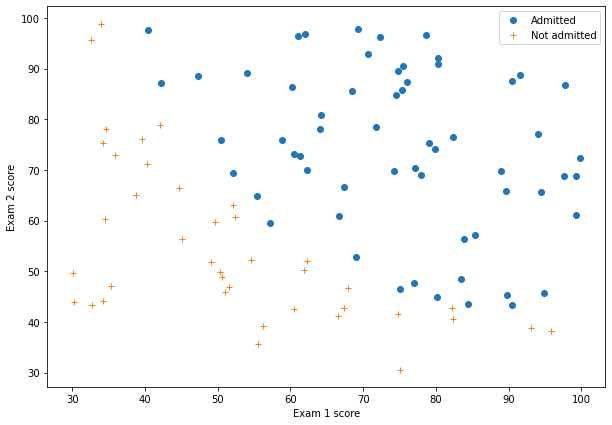

In [12]:
#Visualizing the data
ax = PlotData(x,y)
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
labels = ['Admitted', 'Not admitted']
ax.legend(labels)
plt.show()

In [13]:
# Adding the unity feature
x = np.hstack((np.ones(x.shape[0]).reshape(-1,1), x))

In [14]:
# Calculating the cost and gradient and comparing with expected values

#givens
theta_i = np.zeros(x.shape[1]).reshape(-1,1)
theta_test = np.array([-24,0.2,0.2]).reshape(-1,1)

cost_i = CostFunction(theta_i,x,y)
grad_i = Gradient(theta_i,x,y)
grad_i = list(map(float, grad_i))

cost_test = CostFunction(theta_test,x,y)
grad_test = Gradient(theta_test,x,y)
grad_test = list(map(float, grad_test))

print("For inital theta [0;0;0]:\n")
print('Expected cost (approx): 0.693');
print('Cost calculated : {0:0.4f}\n'.format(float(cost_i)))

print('Expected gradients (approx) :\n -0.1000\t -12.0092\t -11.2628\n')
print('Calculated gradients: \n {:.4f} \t {:.4f} \t {:.4f}'.format(grad_i[0], grad_i[1], grad_i[2]))

print("\n\nFor test theta [-24;0.2;0.2]:\n")
print('Expected cost (approx): 0.218');
print('Cost calculated : {0:0.4f}\n'.format(float(cost_test)))

print('Expected gradients (approx) :\n 0.0430 \t  2.566 \t  2.6470\n')
print('Calculated gradients: \n {:.4f} \t {:.4f} \t {:.4f}'.format(grad_test[0], grad_test[1], grad_test[2]))


For inital theta [0;0;0]:

Expected cost (approx): 0.693
Cost calculated : 0.6931

Expected gradients (approx) :
 -0.1000	 -12.0092	 -11.2628

Calculated gradients: 
 -0.1000 	 -12.0092 	 -11.2628


For test theta [-24;0.2;0.2]:

Expected cost (approx): 0.218
Cost calculated : 0.2183

Expected gradients (approx) :
 0.0430 	  2.566 	  2.6470

Calculated gradients: 
 0.0429 	 2.5662 	 2.6468


In [15]:
# optimization
from scipy import optimize as op

theta_optimal = op.minimize(fun = CostFunction, x0 = theta_i, args = (x, y), method = 'TNC', jac = Gradient).x.reshape(-1,1)
cost_optimum = CostFunction(theta_optimal,x,y)

print('Cost at optimal theta: {:0.4f}'.format(float(cost_optimum)));
print('Expected cost (approx): 0.203\n');
print('Optimal theta:');
print(' {:.4f}\t {:.4f} \t {:.4f} \n'.format(float(theta_optimal[0]), float(theta_optimal[1]), float(theta_optimal[2])))
print('Expected theta (approx):');
print(' -25.161\t0.206   \t  0.201\n');

Cost at optimal theta: 0.2035
Expected cost (approx): 0.203

Optimal theta:
 -25.1613	 0.2062 	 0.2015 

Expected theta (approx):
 -25.161	0.206   	  0.201



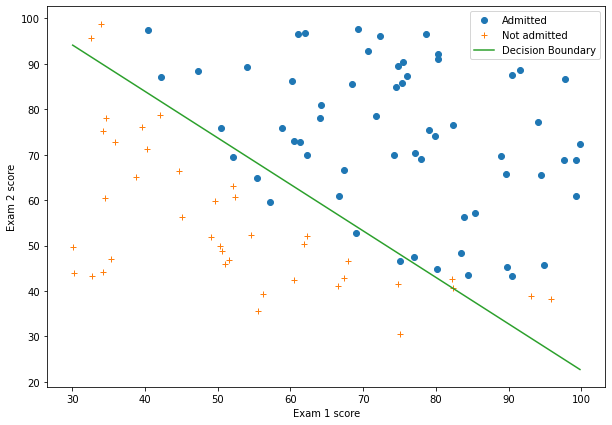

In [16]:
# Plotting the Decision Boundary
ax = PlotDecisionBoundary(theta_optimal,x,y)
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
labels = ['Admitted', 'Not admitted', 'Decision Boundary']
ax.legend(labels)
plt.show()

In [17]:
# Predictions

x_reqd = np.array([1 ,45 ,85]).reshape(1,-1)

print("For a student with marks 45 and 85 in exams 1 and 2:\n")
prob = sigmoid(x_reqd@theta_optimal)
print("Caluclated probability of getting admitted : {:.4f}".format(float(prob)))
print("Expected probability of getting admitted : 0.775 +/- 0.002\n")

prediction = Predict(theta_optimal,x_reqd)
accuracy = np.mean(prediction == y) *100
print("Training accuracy = {}%".format(accuracy))
print("Expected accuracy = 89.0%")


For a student with marks 45 and 85 in exams 1 and 2:

Caluclated probability of getting admitted : 0.7763
Expected probability of getting admitted : 0.775 +/- 0.002

Training accuracy = 60.0%
Expected accuracy = 89.0%


Low Training accuracy in my code can attributed to the cost minimizing algorithm used. In the original MATLAB assignment, " fminunc() " was used to find the optimal theta values. In our case, we have used the "TNC" or Truncated Newton algorithm. 

The choice of this optimizing algorithm was dependent on the sole reason that algorithms or methods offered by Scipy.optimize.minimze() involved some calculations that was not suitable with our matrix formulations.

### Part C : Logistic Regression with Regularization


In [18]:
#load data

data = np.loadtxt("ex2data2.txt", delimiter = ',')
x = data[:,:2]
y = data[:,2].reshape(-1,1)


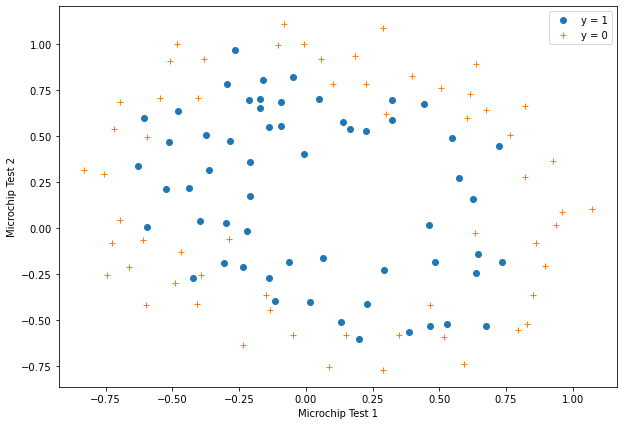

In [19]:
#Visualizing the data
ax = PlotData(x,y)
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel("Microchip Test 2")
labels = ["y = 1", "y = 0"]
ax.legend(labels)
plt.show()

In [20]:
# To map the features to degree 6
x_ = MapFeature(x[:,0],x[:,1])

In [21]:
# Calculating cost and gradient for given theta, and lamda and comparing with expected values
#givens
theta_test = np.ones((x_.shape[1],1))
lamda = 10;

cost = CostFunctionReg(theta_test,x_,y,lamda)
grad = list(map(float,GradientReg(theta_test,x_,y,lamda)))

print('\nCost at test theta (with lamda = 10): {:.4f}'.format( float(cost)));
print('Expected cost (approx): 3.16\n');
print('Gradient at test theta - first five values only:');
for i in grad[:5]:
    print(" {:.4f} ".format(i) , end = '\t')
#print('{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}\t'.format(grad[0]))
print('\nExpected gradients (approx) - first five values only:');
print(' 0.3460 \t 0.1614 \t 0.1948 \t 0.2269 \t 0.0922\n');


Cost at test theta (with lamda = 10): 3.1645
Expected cost (approx): 3.16

Gradient at test theta - first five values only:
 0.3460 	 0.1614 	 0.1948 	 0.2269 	 0.0922 	
Expected gradients (approx) - first five values only:
 0.3460 	 0.1614 	 0.1948 	 0.2269 	 0.0922



In [22]:
#optimizing 
from scipy import optimize as op

theta_i = np.zeros((x_.shape[1],1))
theta_optimal = op.minimize(fun = CostFunction, x0 = theta_i, args = (x_, y), method = 'TNC', jac = Gradient).x.reshape(-1,1)


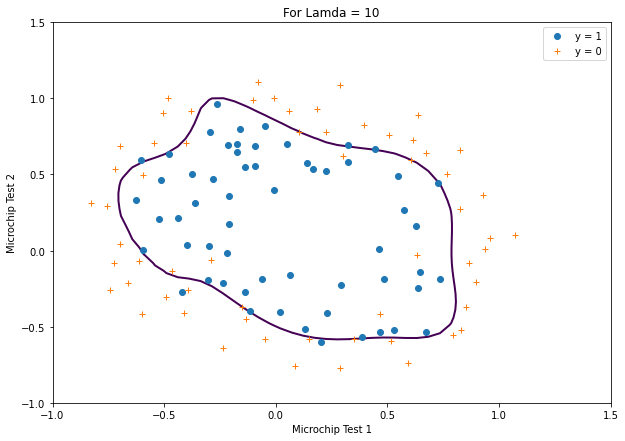

In [23]:
#Plotting the Decision Boundary
ax = PlotDecisionBoundary(theta_optimal, x_, y)
ax.set_title("For Lamda = {}".format(lamda))
ax.set_xlabel("Microchip Test 1")
ax.set_ylabel("Microchip Test 2")
labels = ["y = 1", "y = 0"]
plt.legend(labels)
plt.show()
